# Lecture 1b. Data Exploration Primer

Here we will explore the basics of Pandas with an example dataset from the Chicago Data Portal at https://data.cityofchicago.org. You should take some time to explore the portal and find your own datasets of interest to explore!

Recall from the first notebook that you can use the Pandas load_csv function. We've included that here but commented out that line and have loaded a local file instead to allow 

In [1]:
import pandas as pd

# Use this line as an example to load data directly from the City of Chicago Portal.
# df = pd.read_csv('https://data.cityofchicago.org/api/views/5neh-572f/rows.csv?accessType=DOWNLOAD')

# We have saved the file locally so that you can load the file locally.
df = pd.read_csv('../data/cta-ridership.csv')

## Basic Exploration

Let's first take a quick look at what this data looks like.

### What's in the data?

In [2]:
df.head(5)

,station_id,stationname,date,daytype,rides
0,40850,Library,10/09/2004,A,1057
1,40780,Central Park,06/18/2010,W,1154
2,41500,Montrose-Brown,10/30/2001,W,2116
3,40500,Washington/State,10/26/2006,W,0
4,41090,Monroe/State,07/07/2010,W,9431


Immediately from looking at this, we can get an understanding of the type of data we're looking at.  There's a station identifier and name, a date on which the statistic takes place, the day type, and the number of rides for that date.

It's not immediately clear what A/W, is, but looking at the description of the dataset here:
https://data.cityofchicago.org/Transportation/CTA-Ridership-L-Station-Entries-Daily-Totals/5neh-572f

tells us that this column indicates that we are looking at a weekday, weekend, or holiday.

We can then explore some basic characteristics of the data, including the size of the dataset, min/max/etc. to explore outliers, etc. This basic exploration allows us to spot potential outliers and mistakes in the data.

### What are some basic statistics about the data?

In [3]:
df.shape

(988858, 5)

In [4]:
df.describe()

,station_id,rides
count,988858.000000,988858.000000
mean,40763.358237,3322.844864
std,447.169160,3215.420986
min,40010.000000,0.000000
25%,40370.000000,1123.000000
50%,40750.000000,2324.000000
75%,41150.000000,4351.000000
max,41700.000000,36323.000000


Some basic statistics: There is a station with no rides (minimum is zero!). Also, the station with the maximum number of rides appears to be about 10x the mean and median. Let's have a look at what those stations are.

In [5]:
df['stationname'].value_counts()

Racine                      6959
Montrose-Brown              6957
Western-Forest Park         6956
Monroe/Dearborn             6956
Montrose-O'Hare             6955
Indiana                     6954
Morse                       6951
Noyes                       6951
Roosevelt                   6951
Oak Park-Forest Park        6951
Central-Evanston            6951
Central-Lake                6950
Quincy/Wells                6950
Belmont-O'Hare              6950
Kedzie-Homan-Forest Park    6950
Pulaski-Forest Park         6950
Wilson                      6948
Kedzie-Lake                 6948
Damen/Milwaukee             6948
Lawrence                    6947
Howard                      6947
Kedzie-Midway               6947
California-Lake             6947
Jackson/State               6947
East 63rd-Cottage Grove     6947
54th/Cermak                 6947
Polk                        6947
Monroe/State                6946
Harrison                    6946
Pulaski-Lake                6946
          

### Selection Based on Conditionals

Let's see which stations have the most and fewest rides, overall, and for particular types of days.

#### Station with the most rides

In [6]:
df[df['rides'] == max(df['rides'])].head(1)

,station_id,stationname,date,daytype,rides
676574,41320,Belmont-North Main,06/28/2015,U,36323


Interesting. The station that had the most number of rides was Belmont-North, on June 28, 2015. **What might have caused that?** (Hint: Do a quick Web search for June 28, 2015 to find out what happened on that date in Chicago.)

#### Station with the Least Rides

In [7]:
df[df['rides'] == 0].shape

(12209, 5)

Oops! There are 12,209 station-date combinations with zero rides! Let's have a quick look to understand this further.

In [8]:
zero = df[df['rides'] == 0]
zero.head(5)

,station_id,stationname,date,daytype,rides
3,40500,Washington/State,10/26/2006,W,0
46,40990,69th,08/05/2013,W,0
76,40640,Madison/Wabash,03/12/2016,A,0
128,40500,Washington/State,02/23/2008,A,0
230,40420,Cicero-Cermak,11/16/2003,U,0


Looks like a lot of weekends and holidays.  We can group by columns and types to get a better understanding of what might be going on. We can count how many dates a station had zero rides in the dataset and sort these in descending order.

In [9]:
zerogroups = zero.groupby(['stationname','daytype']).count()
zerogroups.sort_values(by=['date'],ascending=False)

station_id  date  rides
stationname         daytype                         
Madison/Wabash      W               711   711    711
Washington/State    W               516   516    516
Skokie              U               390   390    390
                    A               355   355    355
Randolph/Wabash     W               351   351    351
Wellington          W               338   338    338
Damen-Brown         W               272   272    272
Paulina             W               258   258    258
Irving Park-Brown   W               258   258    258
Southport           W               253   253    253
Addison-Brown       W               250   250    250
Montrose-Brown      W               248   248    248
Damen-Cermak        U               227   227    227
Pulaski-Cermak      U               222   222    222
Central Park        U               221   221    221
California-Cermak   U               221   221    221
18th                U               221   221    221
Cicero-Cermak       U               219   219    219
Western-Cermak      U               219   219    219
Kostner             U               218   218    218
54th/Cermak         U               216   216    216
Kedzie-Cermak       U               214   214    214
Diversey            W               194   194    194
Madison/Wabash      U               174   174    174
                    A               157   157    157
Polk                U               136   136    136
Rockwell            W               122   122    122
Kedzie-Brown        W               122   122    122
Francisco           W               119   119    119
Washington/State    U               112   112    112
...                                 ...   ...    ...
Merchandise Mart    A                 2     2      2
O'Hare Airport      U                 2     2      2
Noyes               U                 2     2      2
Main                A                 2     2      2
Noyes               A                 2     2      2
Cumberland          U                 2     2      2
Irving Park-O'Hare  A                 2     2      2
Cumberland          A                 2     2      2
Linden              A                 1     1      1
Central-Evanston    U                 1     1      1
43rd                U                 1     1      1
Bryn Mawr           U                 1     1      1
43rd                A                 1     1      1
47th-South Elevated A                 1     1      1
                    U                 1     1      1
51st                A                 1     1      1
Addison-O'Hare      A                 1     1      1
Linden              U                 1     1      1
Davis               A                 1     1      1
Addison-O'Hare      U                 1     1      1
Davis               U                 1     1      1
51st                U                 1     1      1
Polk                A                 1     1      1
Foster              A                 1     1      1
                    U                 1     1      1
Skokie              W                 1     1      1
Ashland-Lake        W                 1     1      1
Indiana             U                 1     1      1
                    A                 1     1      1
Central-Evanston    A                 1     1      1

[238 rows x 3 columns]

**Note:** It should be clear from a little bit of research why some of the stations at the top of the list report zero dates. Do a little homework on some of them to find out!

### Exploring Temporal Patterns

First, let's figure out the date range that we're dealing with.

In [10]:
min(df['date'])

'01/01/2001'

In [11]:
max(df['date'])

'12/31/2019'

#### Create a Time Index

So we have all rides from January 1, 2001 to December 31, 2019. Let's do some statistics that group ride statistics by date. First we need to tell Pandas that the date column is in fact a date. So, we convert the column to a proper 'DateTime' type, and then set the index to this column.

This step takes a little bit of time!

In [12]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

Let's see what this does to our data.  Now we can see that the date column is indexed, but the rows are not sorted.

In [13]:
df.head(10)

,station_id,stationname,daytype,rides
date,,,,
2004-10-09,40850,Library,A,1057
2010-06-18,40780,Central Park,W,1154
2001-10-30,41500,Montrose-Brown,W,2116
2006-10-26,40500,Washington/State,W,0
2010-07-07,41090,Monroe/State,W,9431
2009-05-29,40080,Sheridan,W,5601
2008-12-06,40350,UIC-Halsted,A,2038
2009-01-14,40550,Irving Park-O'Hare,W,4122
2013-05-06,40260,State/Lake,W,9512


#### Sort the Dataframe by Date

In [14]:
# Sort the columns by date
rides_by_date = df.sort_values(by='date')
rides_by_date.head(10)

,station_id,stationname,daytype,rides
date,,,,
2001-01-01,40370,Washington/Dearborn,U,1039
2001-01-01,41360,California-Lake,U,213
2001-01-01,40610,Ridgeland,U,141
2001-01-01,41340,LaSalle,U,142
2001-01-01,40230,Cumberland,U,788
2001-01-01,40990,69th,U,2366
2001-01-01,40720,East 63rd-Cottage Grove,U,391
2001-01-01,41480,Western-Brown,U,715
2001-01-01,40380,Clark/Lake,U,1080


#### Sanity Checking

Looks good!  Now let's have a quick look at data for specific stations: the Garfield station at the Red Line and the Green lines, respectively.

In [15]:
garfield_red = rides_by_date[rides_by_date['stationname']=='Garfield-Dan Ryan']
garfield_red.head(14)

,station_id,stationname,daytype,rides
date,,,,
2001-01-01,41170,Garfield-Dan Ryan,U,1457
2001-01-02,41170,Garfield-Dan Ryan,W,3748
2001-01-03,41170,Garfield-Dan Ryan,W,3977
2001-01-04,41170,Garfield-Dan Ryan,W,4185
2001-01-05,41170,Garfield-Dan Ryan,W,4533
2001-01-06,41170,Garfield-Dan Ryan,A,3341
2001-01-07,41170,Garfield-Dan Ryan,U,1972
2001-01-08,41170,Garfield-Dan Ryan,W,4590
2001-01-09,41170,Garfield-Dan Ryan,W,4511


In [16]:
garfield_green = rides_by_date[rides_by_date['stationname']=='Garfield-South Elevated']
garfield_green.head(14)

,station_id,stationname,daytype,rides
date,,,,
2001-01-01,40510,Garfield-South Elevated,U,248
2001-01-02,40510,Garfield-South Elevated,W,617
2001-01-03,40510,Garfield-South Elevated,W,657
2001-01-04,40510,Garfield-South Elevated,W,697
2001-01-05,40510,Garfield-South Elevated,W,770
2001-01-06,40510,Garfield-South Elevated,A,443
2001-01-07,40510,Garfield-South Elevated,U,295
2001-01-08,40510,Garfield-South Elevated,W,695
2001-01-09,40510,Garfield-South Elevated,W,696


## Visualizing Timeseries Data

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(rc={'figure.figsize':(11, 4)})

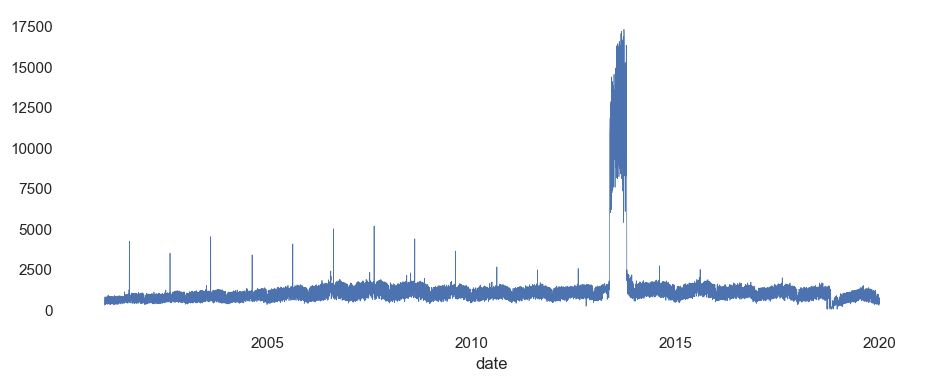

In [18]:
garfield_green['rides'].plot(linewidth=0.5)

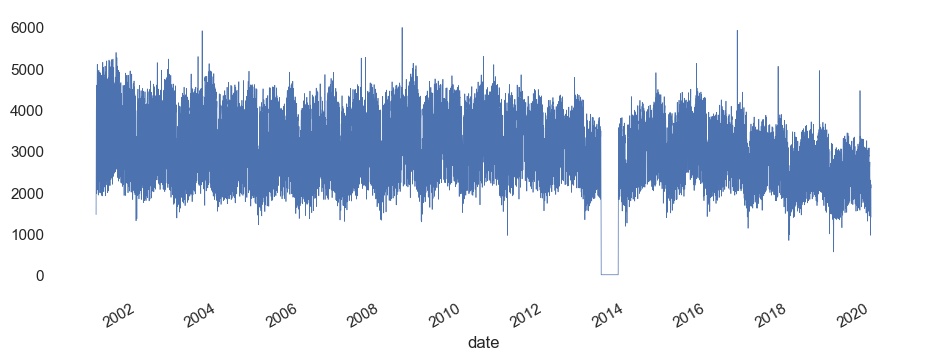

In [19]:
garfield_red['rides'].plot(linewidth=0.5)

Interesting!  You can see a jump in ridership at the Garfield Green Line ridership right at the same time there's a dip in the Garfield Red Line ridership. What happened?  Here's a clue: https://www.transitchicago.com/redsouth/

Let's now go back and see what happened to the Madison/Wabash station. And why there were so many zero values in the data.

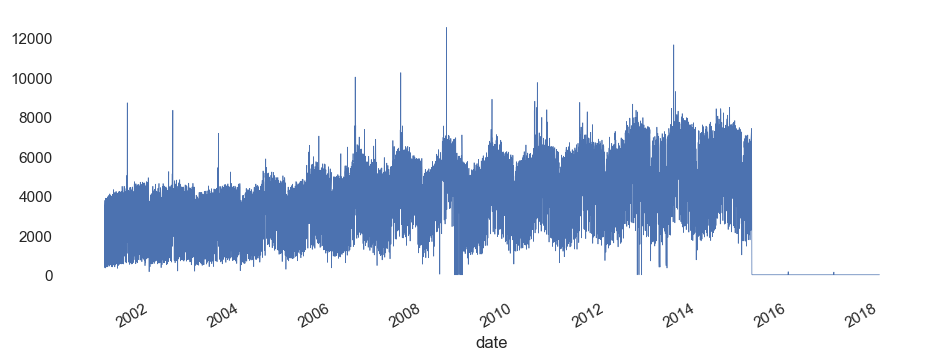

In [20]:
rides_by_date[rides_by_date['stationname']=='Madison/Wabash']['rides'].plot(linewidth=0.5)

How do we know whether this is just a glitch in the dataset, or a real event? A little web searching can tell you a bit about this station. https://en.wikipedia.org/wiki/Madison/Wabash_station

"Madison/Wabash closed on March 16, 2015, after Sunday service in the Loop ceased for the night. The entrances were boarded up by morning-time, and trains started bypassing the station when Monday morning service started."